**TEXT MINNING ON TWITTER DATA**

**importing necessary libraries for performing text mining**

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import tweepy
import re
import nltk
import collections
import itertools
from nltk.corpus import stopwords

In [5]:
api = "OEKRaIQgspmcwdBXS0hQ59Uvl"
api_secret = "Jwz8NhtxMHoIYFjNJy5QUz4UHEQovmbQaYhUq180dzdsGI6H8c"
access_token = "1289602680118075393-R4Ld6C9b77uFhaMRzBmM13GNm2D2YE"
access_secret_token = "upsbOsGQoStFz5iSS5RW5NLUM8Cs63th8psIBhP1nIKcw"

In [6]:
auth = tweepy.OAuthHandler(api,api_secret)
auth.set_access_token(access_token,access_secret_token)
api = tw.API(auth, wait_on_rate_limit=True)

In [8]:
search_term = "#bitcoin"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-11-16').items(1000)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:10]

['RT @MMCrypto: #BITCOIN HAS NO TOP AS FIAT HAS NO BOTTOM!!!!!!!!!!!!!',
 'RT @MMCrypto: GREYSCALE IS NOW HOLDING 655‘700 #BITCOIN!',
 'Yep! \n\n$xlm #crypto #bitcoin https://t.co/DZYUwm5eYw',
 '#bitcoin\nWill Powell Unveil Operation Twist 3.0 Tomorrow? | ZeroHedge https://t.co/RN88XuGvtG',
 '#bitcoin price roday $51,400. 🤡 @PeterSchiff https://t.co/oi46zBEAzd',
 'RT @GoingParabolic: In 48 hours I’m going to give one random person that retweets this tweet $10,000 in #Bitcoin ! \n\n Make sure you follow…',
 'RT @BTC_Archive: 42% of Wealth Managers in Europe are looking into #Bitcoin as an option for their clients. \n- survey by Nickel Digital',
 'RT @latokens: Earn a share of 500K $CT coins on LATOKEN! 🔥\n\nJoin the @CliqToken Airdrop, and complete easy social tasks to earn rewards. 🎁💰…',
 'RT @BTC_Archive: Amazon will probably start accepting #Bitcoin pretty soon \n- Tim Draper\n\n#Bitcoin Billionaire and Venture Capitalist',
 'RT @latokens: Earn a share of 500K $CT coins on LATOKEN! 🔥

In [9]:
def remove_url(txt):
    
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [10]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:10]


['RT MMCrypto BITCOIN HAS NO TOP AS FIAT HAS NO BOTTOM',
 'RT MMCrypto GREYSCALE IS NOW HOLDING 655700 BITCOIN',
 'Yep xlm crypto bitcoin',
 'bitcoinWill Powell Unveil Operation Twist 30 Tomorrow ZeroHedge',
 'bitcoin price roday 51400 PeterSchiff',
 'RT GoingParabolic In 48 hours Im going to give one random person that retweets this tweet 10000 in Bitcoin Make sure you follow',
 'RT BTCArchive 42 of Wealth Managers in Europe are looking into Bitcoin as an option for their clients survey by Nickel Digital',
 'RT latokens Earn a share of 500K CT coins on LATOKEN Join the CliqToken Airdrop and complete easy social tasks to earn rewards',
 'RT BTCArchive Amazon will probably start accepting Bitcoin pretty soon Tim DraperBitcoin Billionaire and Venture Capitalist',
 'RT latokens Earn a share of 500K CT coins on LATOKEN Join the CliqToken Airdrop and complete easy social tasks to earn rewards']

**Split the words from one tweet into unique elements**

In [11]:

all_tweets_no_urls[0].split()

['RT',
 'MMCrypto',
 'BITCOIN',
 'HAS',
 'NO',
 'TOP',
 'AS',
 'FIAT',
 'HAS',
 'NO',
 'BOTTOM']

**Split the words from one tweet into unique elements in lower case**

In [12]:
all_tweets_no_urls[0].lower().split()

['rt',
 'mmcrypto',
 'bitcoin',
 'has',
 'no',
 'top',
 'as',
 'fiat',
 'has',
 'no',
 'bottom']

**Create a list of lists containing lowercase words for each tweet**

In [13]:

words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:3]

[['rt',
  'mmcrypto',
  'bitcoin',
  'has',
  'no',
  'top',
  'as',
  'fiat',
  'has',
  'no',
  'bottom'],
 ['rt', 'mmcrypto', 'greyscale', 'is', 'now', 'holding', '655700', 'bitcoin'],
 ['yep', 'xlm', 'crypto', 'bitcoin']]

**List of all words across tweets**

In [14]:
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter to count the number of tweets
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(20)

[('rt', 763),
 ('and', 574),
 ('bitcoin', 502),
 ('to', 485),
 ('the', 466),
 ('earn', 383),
 ('in', 360),
 ('of', 345),
 ('a', 341),
 ('on', 288),
 ('is', 272),
 ('between', 271),
 ('this', 260),
 ('latokens', 249),
 ('latoken', 217),
 ('rewards', 215),
 ('complete', 196),
 ('join', 195),
 ('share', 194),
 ('airdrop', 193)]

In [15]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(25),
                             columns=['words', 'count'])

clean_tweets_no_urls.head(10)

,words,count
0,rt,763
1,and,574
2,bitcoin,502
3,to,485
4,the,466
5,earn,383
6,in,360
7,of,345
8,a,341
9,on,288


**Plot horizontal bar graph**

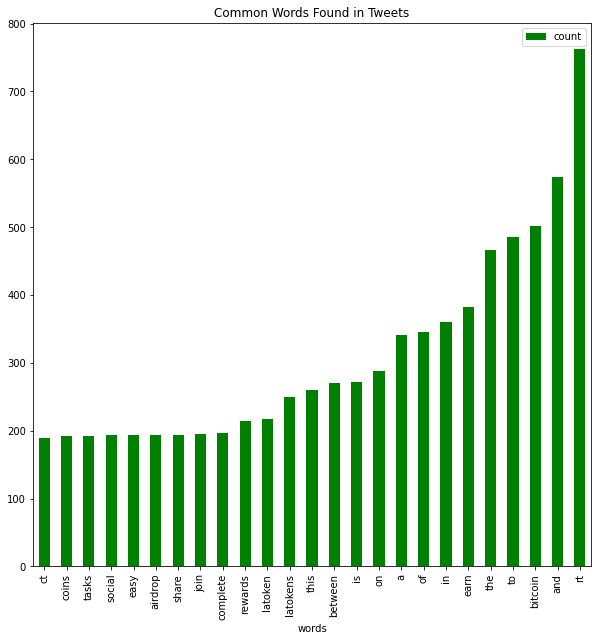

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))


clean_tweets_no_urls.sort_values(by='count').plot.bar(x='words',
                      y='count',
                      ax=ax,color='green')

ax.set_title("Common Words Found in Tweets")

plt.show()

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['during', 'we', 'such', 'your', 'did', 'an', 'between', 'am', 'above', 'all']

**Tweets with stopwords **

In [19]:

words_in_tweet[0]

['rt',
 'mmcrypto',
 'bitcoin',
 'has',
 'no',
 'top',
 'as',
 'fiat',
 'has',
 'no',
 'bottom']

**Words after removal of stopwords**

In [20]:
for all_words in words_in_tweet:
    for word in all_words:
        # remove stop words
        tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['rt', 'mmcrypto', 'bitcoin', 'top', 'fiat', 'bottom']

In [21]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(20)

[('rt', 763),
 ('bitcoin', 502),
 ('earn', 383),
 ('latokens', 249),
 ('latoken', 217),
 ('rewards', 215),
 ('complete', 196),
 ('join', 195),
 ('share', 194),
 ('airdrop', 193),
 ('easy', 193),
 ('social', 193),
 ('coins', 192),
 ('tasks', 192),
 ('ct', 189),
 ('cliqtoken', 189),
 ('500k', 188),
 ('new', 161),
 ('value', 144),
 ('hit', 138)]

In [22]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])
clean_tweets_nsw.head(10)

,words,count
0,rt,763
1,bitcoin,502
2,earn,383
3,latokens,249
4,latoken,217
5,rewards,215
6,complete,196
7,join,195
8,share,194
9,airdrop,193


**Plotting the frequency of clean tweets without stopwords**

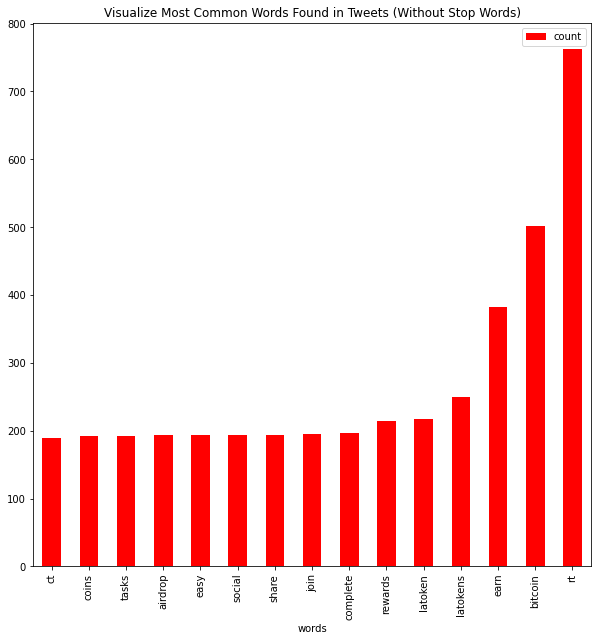

In [30]:
 fig, ax = plt.subplots(figsize=(10, 10))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.bar(x='words',
                      y='count',
                      ax=ax,color='red')

ax.set_title("Visualize Most Common Words Found in Tweets (Without Stop Words)")

plt.show()